<a href="https://colab.research.google.com/github/Zenologos/Data-Analysis/blob/master/YouTube_Viral_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
#mydf = pd.read_csv('CAvideos.csv')
#mydf = pd.read_csv('INvideos.csv')
#mydf = pd.read_csv('DEvideos.csv')
mydf = pd.read_csv('FRvideos.csv')
#mydf = pd.read_csv('USvideos.csv')
#mydf = pd.read_csv('GBvideos.csv')
#US['Countryid'] = 1
#GB['Countryid'] = 0
#mydf = pd.concat([US, GB])

In [63]:
mydf.sort_values(['title','trending_date'], ascending=[False,False]).head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
32343,312Uu9zFZQI,18.18.05,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,2018-05-16T06:39:18.000Z,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",384964,7488,316,333,https://i.ytimg.com/vi/312Uu9zFZQI/default.jpg,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...
32479,312Uu9zFZQI,18.18.05,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,2018-05-16T06:39:18.000Z,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",384964,7488,316,333,https://i.ytimg.com/vi/312Uu9zFZQI/default.jpg,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...
32155,312Uu9zFZQI,18.17.05,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,2018-05-16T06:39:18.000Z,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",215725,6203,203,316,https://i.ytimg.com/vi/312Uu9zFZQI/default.jpg,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...
32285,312Uu9zFZQI,18.17.05,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,2018-05-16T06:39:18.000Z,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",215725,6203,203,316,https://i.ytimg.com/vi/312Uu9zFZQI/default.jpg,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...
1887,iIzRYZyrg8U,17.23.11,🔴[Live]Kandhala Jattan (Hoshiarpur) Kabaddi To...,Kabaddi365.com,17,2017-11-22T17:24:56.000Z,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",200467,3047,210,9,https://i.ytimg.com/vi/iIzRYZyrg8U/default.jpg,False,False,False,Kandhala Jattan (Hoshiarpur) Kabaddi Tournamen...
2878,Tv3VsWnwqrQ,17.28.11,🔴[Live] Toosa (Ludhiana) Kabaddi Tournament 27...,Kabaddi365.com,17,2017-11-27T17:16:17.000Z,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",58937,669,18,1,https://i.ytimg.com/vi/Tv3VsWnwqrQ/default.jpg,False,False,False,🔴[Live] Toosa (Ludhiana) Kabaddi Tournament 27...
10099,r9t_LVsnXrE,18.06.01,🔴[Live] Tibba (Kapurthala) North India Federat...,Kabaddi365.com,17,2018-01-05T15:13:07.000Z,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",178146,1960,94,10,https://i.ytimg.com/vi/r9t_LVsnXrE/default.jpg,False,False,False,🔴[Live] Tibba (Kapurthala) North India Federat...
7764,B21MOxooxDk,17.24.12,🔴[Live] Sardulgarh (Mansa) Kabaddi Tournament ...,Kabaddi365.com,17,2017-12-22T22:33:34.000Z,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",158586,2113,151,28,https://i.ytimg.com/vi/B21MOxooxDk/default.jpg,False,False,False,🔴[Live] Sardulgarh (Mansa) Kabaddi Tournament ...
7535,B21MOxooxDk,17.23.12,🔴[Live] Sardulgarh (Mansa) Kabaddi Tournament ...,Kabaddi365.com,17,2017-12-22T22:33:34.000Z,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",136148,2016,134,11,https://i.ytimg.com/vi/B21MOxooxDk/default.jpg,False,False,False,🔴[Live] Sardulgarh (Mansa) Kabaddi Tournament ...
688,xLTyB3tMOm0,17.17.11,🔴[Live] Sarabha (Ludhiana) Kabaddi Tournament ...,Kabaddi365.com,17,2017-11-16T15:36:46.000Z,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",127803,1913,145,8,https://i.ytimg.com/vi/xLTyB3tMOm0/default.jpg,False,False,False,🖐🏿👉if you like it deserved and must share\n\n👉...


In [64]:
mydf.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...
37351,wERgpPK44w0,18.14.06,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,2018-06-10T04:29:54.000Z,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...


In [65]:
mydf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [66]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [67]:
mydf.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [68]:
mydf['trending_date']=pd.to_datetime(mydf['trending_date'], format='%y.%d.%m')
mydf['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [69]:
mydf['publish_time']=pd.to_datetime(mydf['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
mydf['publish_time'].head()

0   2017-11-12 12:20:39
1   2017-11-13 05:43:56
2   2017-11-12 15:48:08
3   2017-11-12 07:08:48
4   2017-11-13 01:14:16
Name: publish_time, dtype: datetime64[ns]

In [70]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                37352 non-null  object        
 1   trending_date           37352 non-null  datetime64[ns]
 2   title                   37352 non-null  object        
 3   channel_title           37352 non-null  object        
 4   category_id             37352 non-null  int64         
 5   publish_time            37352 non-null  datetime64[ns]
 6   tags                    37352 non-null  object        
 7   views                   37352 non-null  int64         
 8   likes                   37352 non-null  int64         
 9   dislikes                37352 non-null  int64         
 10  comment_count           37352 non-null  int64         
 11  thumbnail_link          37352 non-null  object        
 12  comments_disabled       37352 non-null  bool  

In [71]:
print(mydf.shape)

tdf = mydf[~mydf.duplicated(['title'], keep='last')]
df = pd.DataFrame(tdf)
print(df.shape)
df.index.duplicated().any()
df.info()
df.head(20)


(37352, 16)
(16721, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16721 entries, 6 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                16721 non-null  object        
 1   trending_date           16721 non-null  datetime64[ns]
 2   title                   16721 non-null  object        
 3   channel_title           16721 non-null  object        
 4   category_id             16721 non-null  int64         
 5   publish_time            16721 non-null  datetime64[ns]
 6   tags                    16721 non-null  object        
 7   views                   16721 non-null  int64         
 8   likes                   16721 non-null  int64         
 9   dislikes                16721 non-null  int64         
 10  comment_count           16721 non-null  int64         
 11  thumbnail_link          16721 non-null  object        
 12  comments_disabled     

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11 16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
12,Prb_osSVE0M,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,2017-11-13 09:51:59,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,716,53,0,https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg,True,False,False,Renu Desai gives a low rating for Pawan Kalyan...
13,KHxdrECEsD0,2017-11-14,Peehu Srivastav Performs On Daiya Yeh Main kah...,The Voice India Kids,24,2017-11-11 19:19:13,"the voice of india|""TVOI""|""the voice of india ...",472413,2611,250,174,https://i.ytimg.com/vi/KHxdrECEsD0/default.jpg,False,False,False,Peehu Srivastav grabs the attention of the jud...
16,ep3SLMuRbvg,2017-11-14,TYPES OF STUDENTS- | Elvish Yadav |,Elvish yadav,23,2017-11-13 11:26:02,"TYPES OF STUDENTS ELVISH YADAV|""elvish yadav""|...",344545,25717,417,2870,https://i.ytimg.com/vi/ep3SLMuRbvg/default.jpg,False,False,False,This video shows different types of students p...
22,1kuJkA9usqg,2017-11-14,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,2017-11-13 15:00:01,"deivamagal|""deiva magal""|""deiva magal serial""|...",387221,2159,1214,711,https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg,False,False,False,Deivamagal Episode 1387\nSubscribe: https://go...
24,znOC3IU0dF8,2017-11-14,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13 06:03:49,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,2017-11-14,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12 09:45:58,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
31,gW4Su5wq0b8,2017-11-14,Neeya Naana - 12th November 2017 - Promo 2,Vijay Television,24,2017-11-11 07:49:46,"Neeya Naana|""NN""|""Gopinath""|""Men Vs Women Seri...",261202,1971,126,201,https://i.ytimg.com/vi/gW4Su5wq0b8/default.jpg,False,False,False,#நீயாநானா | ஞாயிறு மதியம் 3 மணிக்கு உங்கள் வி...
33,P-pycrmifwU,2017-11-14,Natural Star Nani REAL Behaviour Shocks You | ...,NewsQube,24,2017-11-13 06:57:02,"newsqube|""latest Movies""|""telugu movie Trailer...",423009,1514,347,118,https://i.ytimg.com/vi/P-pycrmifwU/default.jpg,False,False,False,Natural Star Nani REAL Behiour Shocks You |. N...
36,qP67alYxSiU,2017-11-14,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12 03:53:49,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


In [72]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
6,2017-11-11,16:41:15
12,2017-11-13,09:51:59
13,2017-11-11,19:19:13
16,2017-11-13,11:26:02
22,2017-11-13,15:00:01


In [73]:
df['publish_date']=pd.to_datetime(df['publish_date'])

In [74]:
df['trend'] = df['trending_date'] - df['publish_date']
df['trend'] = df['trend'].dt.days.astype('int16') # converting number of trending days into integer for arithmetic calculations
df['trend'].head()

6     3
12    1
13    3
16    1
22    1
Name: trend, dtype: int16

In [75]:
Mask1=df['views'] > 5000000
Mask2= df['trend'].between(3,7)
df['viral']=Mask1&Mask2
df['viral'].head()
df['viral'].value_counts()

False    16418
True       303
Name: viral, dtype: int64

In [76]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

In [77]:
type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16721 entries, 6 to 37351
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                16721 non-null  object        
 1   trending_date           16721 non-null  datetime64[ns]
 2   title                   16721 non-null  object        
 3   channel_title           16721 non-null  object        
 4   publish_date            16721 non-null  datetime64[ns]
 5   category_id             16721 non-null  object        
 6   publish_time            16721 non-null  object        
 7   tags                    16721 non-null  object        
 8   views                   16721 non-null  int64         
 9   likes                   16721 non-null  int64         
 10  dislikes                16721 non-null  int64         
 11  comment_count           16721 non-null  int64         
 12  thumbnail_link          16721 non-null  object

In [79]:
import json
id_to_category = {}
#if cid == 1: 
#with open('CA_category_id.json', 'r') as f:
with open('IN_category_id.json', 'r') as f:
#with open('DE_category_id.json', 'r') as f:
#with open('FR_category_id.json', 'r') as f:
#with open('US_category_id.json', 'r') as f:
#with open('GB_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
id_to_category
#Inserting to Category Name
df.insert(4, 'category', df['category_id'].map(id_to_category))
df[['category_id', 'category']].head()

,category_id,category
6,10,Music
12,25,News & Politics
13,24,Entertainment
16,23,Comedy
22,24,Entertainment


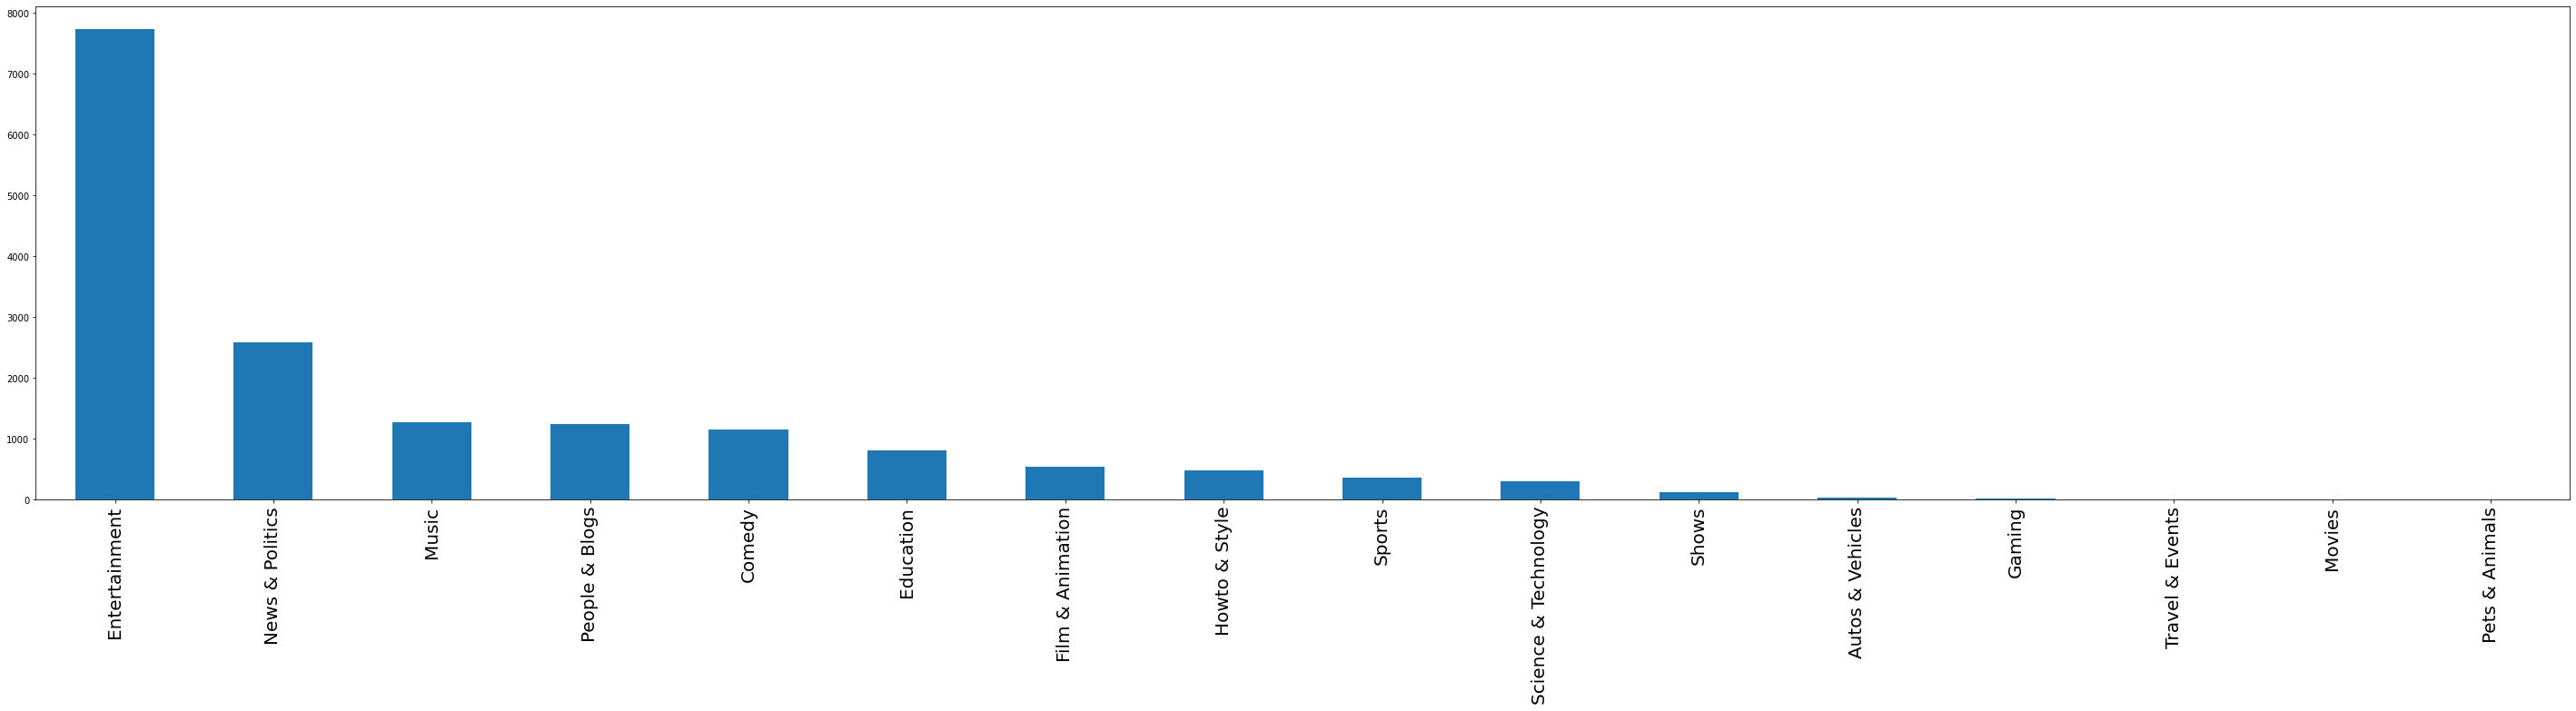

In [82]:
category_count = df['category'].value_counts() # frequency for each category
ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, fontsize=20)
#plt.figure(figsize=(100,100))
rcParams['figure.figsize'] = 50,10
plt.show()

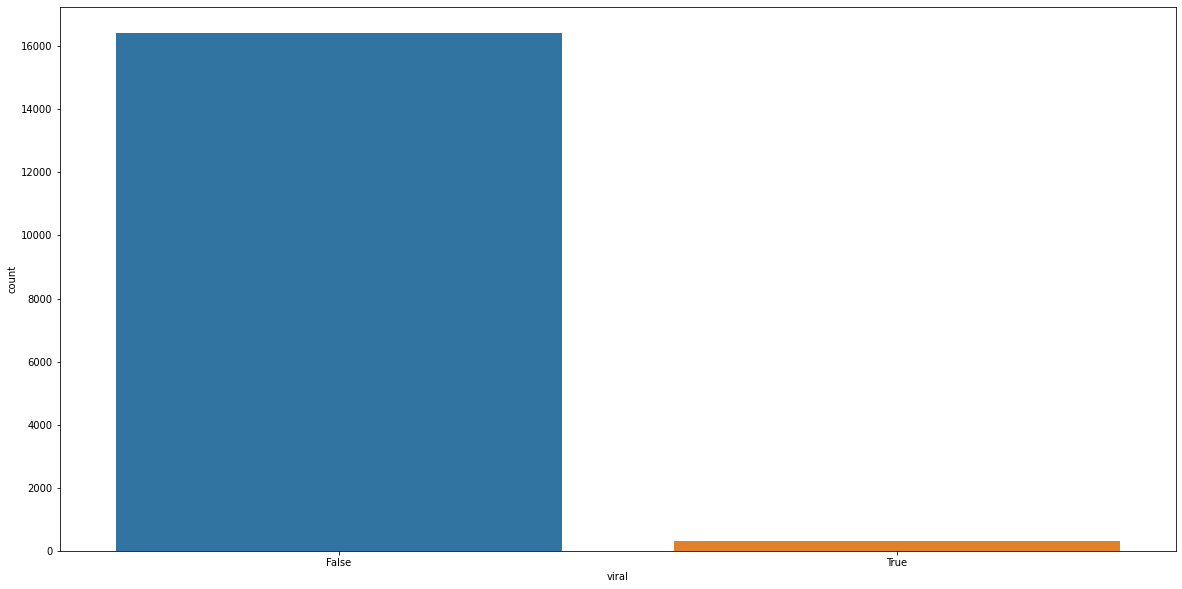

In [84]:
sns.countplot(x=df['viral']) # count plot reflecting on the number of videos which went viral
rcParams['figure.figsize'] = 20,10
plt.show()

In [ ]:
#vdf = df[df['viral']==True]

In [ ]:
#vdf.sort_values(['views','trending_date'], ascending=[False,False]).head(20)

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral
5935,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",7,True
5699,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",6,True
5452,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",5,True
5236,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4,True
34420,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06,10,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,7,True
36816,7C2z4GqqS5E,2018-05-25,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18,10,09:00:02,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",92054928,5232318,179451,1163977,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,7,True
4514,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584672,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,7,True
36611,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18,10,09:00:02,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150831,172570,1142269,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,6,True
34202,VYOjWnS4cMY,2018-05-12,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06,10,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,289682,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,6,True
4276,6ZfuNTqbHE8,2017-12-05,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,6,True


In [87]:
def visualize_most(df, column, num=10): # getting the top 10 videos by default
    sorted_df = df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['category']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, fontsize=10) 
    fig = plt.gcf()
    fig.set_size_inches(20,8)
    plt.show()
    

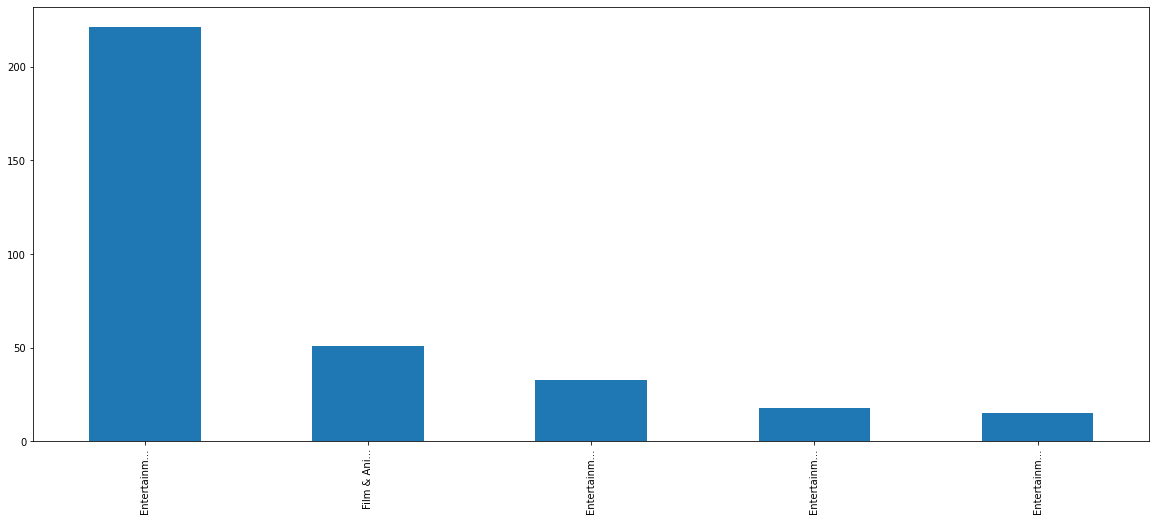

In [89]:
#5 most trending videos
visualize_most(df, 'trend', 5)


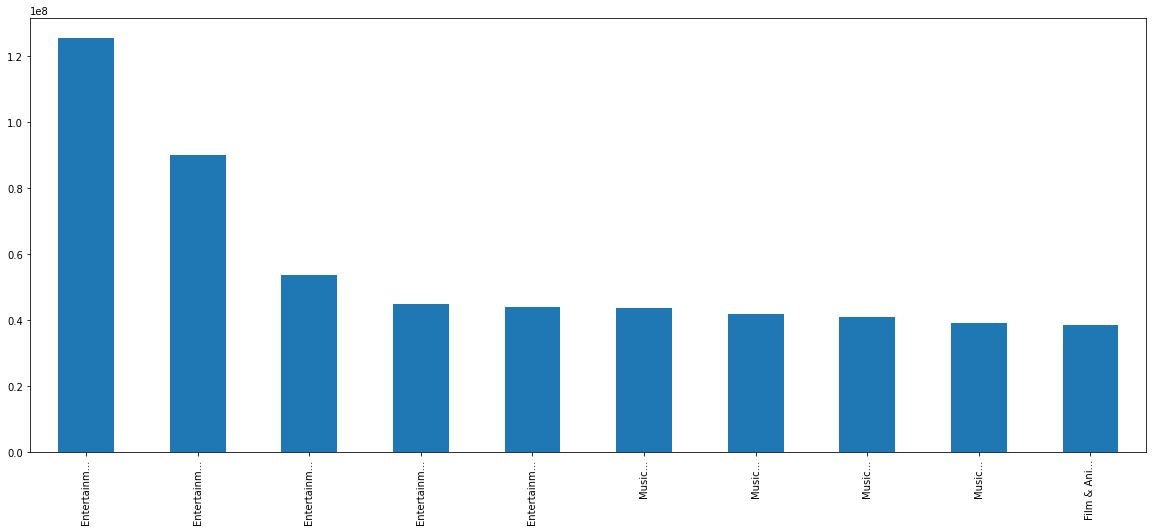

In [90]:
#10 most watched videos
visualize_most(df, 'views', 10)

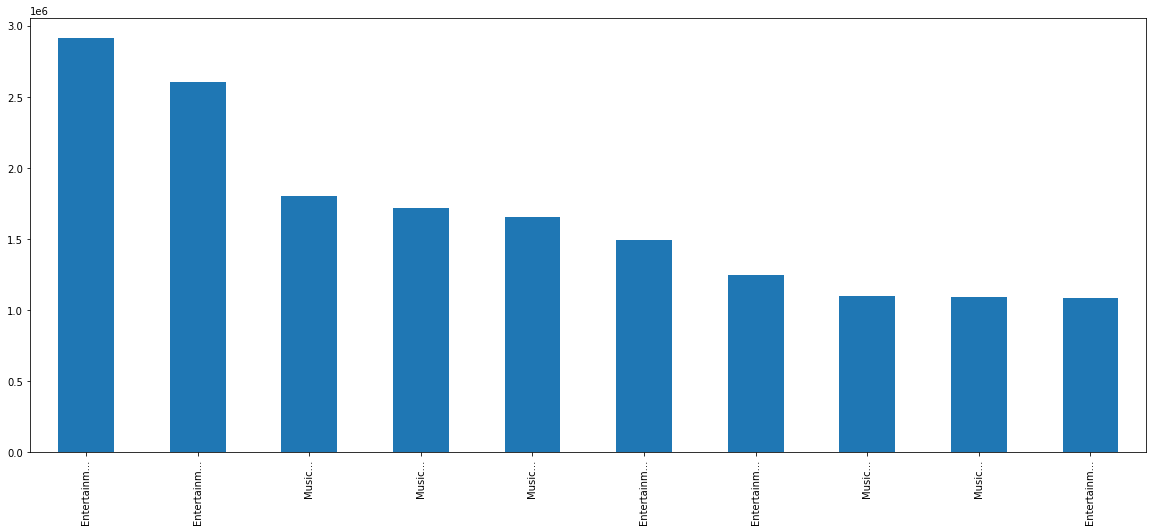

In [91]:
#10 most liked videos
visualize_most(df, 'likes', 10)

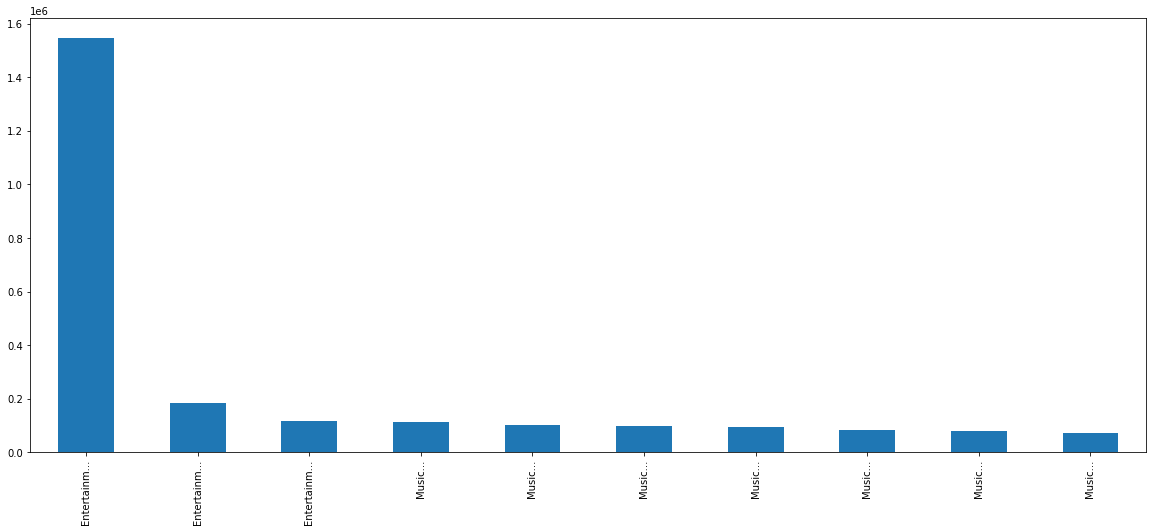

In [92]:
#10 most disliked videos
visualize_most(df, 'dislikes', 10)

In [93]:
def visualize_statistics(my_df, id_list): # taking a list of video ids
    target_df = my_df.loc[id_list]
    
    ax = target_df[['views', 'likes', 'dislikes', 'comment_count']].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=20)
    rcParams['figure.figsize'] = 50,20
    
    plt.show()

In [94]:
sample_id_list = df.sample(n=25, random_state=4).index # creates a random sample of 10 video IDs
sample_id_list

Int64Index([25359,  5293,  9808, 28377, 12230, 14061, 18466, 17715,  3696,
            24684,   796, 31302, 26835, 37079, 11559,  8298, 26933,  9628,
             9815,  4134,  5514, 31178, 37329, 28143, 36041],
           dtype='int64')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3114 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3125 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3093 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3123 missing from current font.
  font.set_text(s

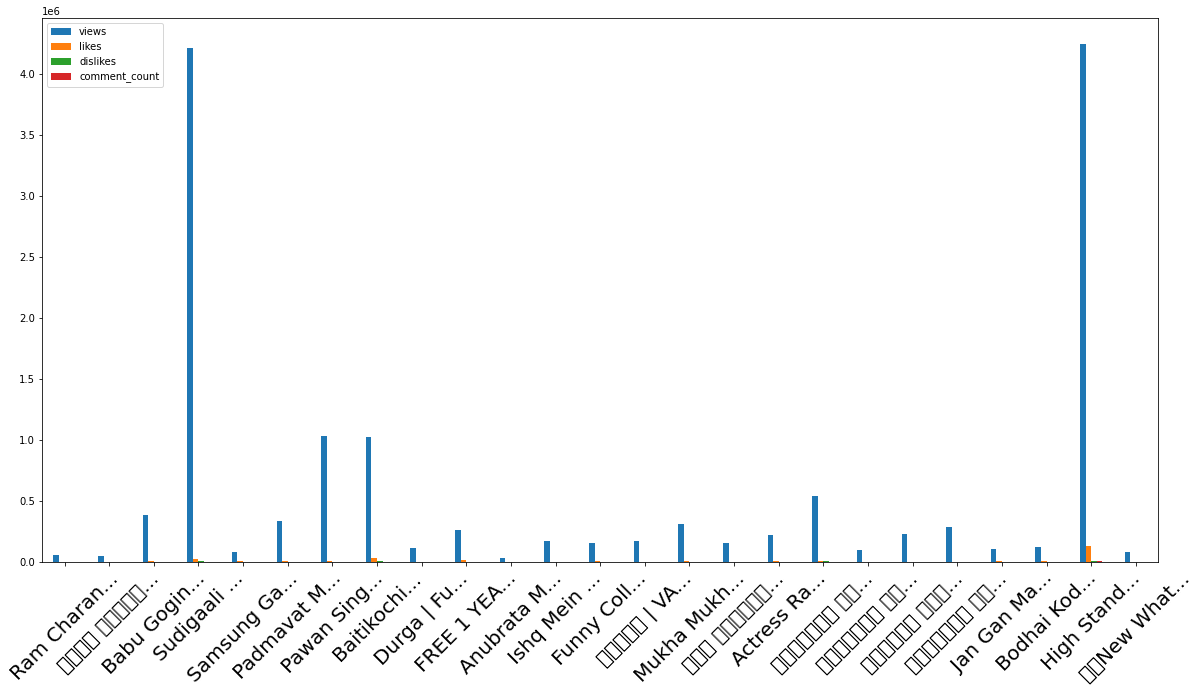

In [95]:
visualize_statistics(df, sample_id_list)

In [96]:
df[df['dislikes']>1000]

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral
6,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,Music,2017-11-11,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,3,True
22,1kuJkA9usqg,2017-11-14,"Deivamagal Episode 1387, 13/11/17",VikatanTV,Entertainment,2017-11-13,24,15:00:01,"deivamagal|""deiva magal""|""deiva magal serial""|...",387221,2159,1214,711,https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg,False,False,False,Deivamagal Episode 1387\nSubscribe: https://go...,1,False
40,JSkOecmAFFo,2017-11-14,Girls On A Date ft. Komal Pandey | The Timeliners,The Timeliners,Entertainment,2017-11-11,24,09:32:05,"Date|""Girls""|""Hot Girls""|""Sanskaari Girls""|""Bo...",793778,21956,1590,1661,https://i.ytimg.com/vi/JSkOecmAFFo/default.jpg,False,False,False,Planning to go on a date? Watch this video fir...,3,False
61,ozZ8HpIBsGw,2017-11-14,Mersal - A minute of Aalaporaan Thamizhan | Vi...,Sony Music India,Music,2017-11-10,10,11:30:01,"Sony Music India|""Sony Music""|""Latest Hits""|""k...",1449239,120289,3108,3296,https://i.ytimg.com/vi/ozZ8HpIBsGw/default.jpg,False,False,False,‘Aalaporaan Thamizhan’ is a larger than life c...,4,False
89,3QsBs8JM3sM,2017-11-14,"Half Boil | Web Series - Episode 7 | Gopi,Sudh...",Madras Central,Entertainment,2017-11-10,24,11:36:01,"madrascentral|""halfboil""|""episode7""|""paridhaba...",868921,34242,1317,4604,https://i.ytimg.com/vi/3QsBs8JM3sM/default.jpg,False,False,False,Finally vishnu confesses about his relationshi...,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37331,s5H7g9x4O-0,2018-06-14,Manju - Kahani Ek Bai Ki | Sanju Trailer Spoof...,Girliyapa,People & Blogs,2018-06-11,22,06:45:26,"the viral fever|""tvf""|""the timeliners""|""the sc...",1000490,52438,5557,2789,https://i.ytimg.com/vi/s5H7g9x4O-0/default.jpg,False,False,False,Very few stories of a Bai in our times are as ...,3,False
37341,Atj7UQ_dD-E,2018-06-14,TVF Shots | Bill Main Dunga,The Viral Fever,Entertainment,2018-06-12,24,15:39:24,"the viral fever|""tvf""|""humour""|""qtiyapa""|""come...",469379,21543,2579,1250,https://i.ytimg.com/vi/Atj7UQ_dD-E/default.jpg,False,False,False,"Baap ka, dada ka, Jija ka, saale ka, bua ke be...",2,False
37343,zIvfX9vc0Nw,2018-06-14,THINGS GUJARATIS ARE TIRED OF HEARING FT. Tath...,Hasley India,Comedy,2018-06-11,23,13:17:24,"hasley|""india""|""harsh""|""beniwal""|""rishhsome""|""...",447755,23896,1304,1340,https://i.ytimg.com/vi/zIvfX9vc0Nw/default.jpg,False,False,False,So we are back with a new comedy sketch on our...,3,False
37345,tR5FZC2FP-U,2018-06-14,"Priyamanaval Episode 1040, 13/06/18",VikatanTV,Shows,2018-06-13,43,17:00:04,"priyamanaval episode 1040|""Priyamanaval 13.06....",535254,3105,1403,898,https://i.ytimg.com/vi/tR5FZC2FP-U/default.jpg,False,False,False,Priyamanaval Episode 1040Subscribe: https://go...,1,False


In [97]:
df.sort_values('dislikes', ascending = False)

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral
5408,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",6,True
33289,xBht9TG7ySw,2018-05-23,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15,24,12:13:00,"Race 3|""Race 3 Official Trailer""|""Salman Khan""...",29437104,564399,182589,95395,https://i.ytimg.com/vi/xBht9TG7ySw/default.jpg,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,8,False
5887,khPLWaBioOs,2017-12-14,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,Entertainment,2017-12-10,24,21:32:44,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",11767339,882821,117842,150856,https://i.ytimg.com/vi/khPLWaBioOs/default.jpg,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...,4,True
34543,D9kxpUcWID0,2018-05-30,"Selfish Song Video - Race 3 | Salman Khan, Bob...",Tips Official,Music,2018-05-25,10,06:29:52,"race 3 trailer|""salman khan""|""jacqueline ferna...",16169625,215228,114882,46332,https://i.ytimg.com/vi/D9kxpUcWID0/default.jpg,False,False,False,Atif Aslam & Iulia Vantur team up with Vishal ...,5,True
7606,WS7f5xpGYn8,2017-12-23,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20,10,20:00:02,"katy perry|""hey hey hey""|""official""|""music vid...",12023527,519160,101457,52759,https://i.ytimg.com/vi/WS7f5xpGYn8/default.jpg,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16910,cDNJKtpP1ug,2018-02-14,Why Sai Dharam Tej Always Follows Chiranjeevi'...,YOYO Cine Talkies,Entertainment,2018-02-11,24,07:40:47,"sai dharam tej|""ram charan""|""chiranjeevi""|""chi...",304033,0,0,0,https://i.ytimg.com/vi/cDNJKtpP1ug/default.jpg,True,True,False,Why Sai Dharam Tej Always Follows Chiranjeevi'...,3,False
33869,-34EvVQ9sqo,2018-05-26,One More Succumb To Nipah Virus; Death Toll 12...,Mathrubhumi News,News & Politics,2018-05-24,25,09:11:02,"mathrubhuminews.in|""Mathrubhumi""|""mathrubhumi ...",210740,0,0,43,https://i.ytimg.com/vi/-34EvVQ9sqo/default.jpg,False,True,False,Kozhikode: One more person died due to the in...,2,False
5252,Oagl7kJJkRY,2017-12-11,ప‌వ‌న్ పై భ‌గ్గుమ‌న్న ఎమ్మెల్యే అనిల్ కుమార్ య...,Sakshi TV,News & Politics,2017-12-08,25,14:13:27,YSRCP MLA Anil Kumar Yadav Strong Warning To P...,373823,0,0,0,https://i.ytimg.com/vi/Oagl7kJJkRY/default.jpg,True,True,False,YSRCP MLA Anil Kumar Yadav Strong Warning To P...,3,False
5253,tZZu1s6KZYo,2017-12-11,"9 December, 2017 Prelim Booster Discussion, N...",only ias,Education,2017-12-09,27,05:06:26,[none],24274,0,0,0,https://i.ytimg.com/vi/tZZu1s6KZYo/default.jpg,True,True,False,Subscribe to http://www.onlyias.com/\n\nLike u...,2,False


In [98]:
def visualize_like_dislike(my_df, id_list):
    target_df = my_df.loc[id_list]
    
    ax = target_df[['likes', 'dislikes']].plot.bar(stacked=True)
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3114 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3125 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3093 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3123 missing from current font.
  font.set_text(s

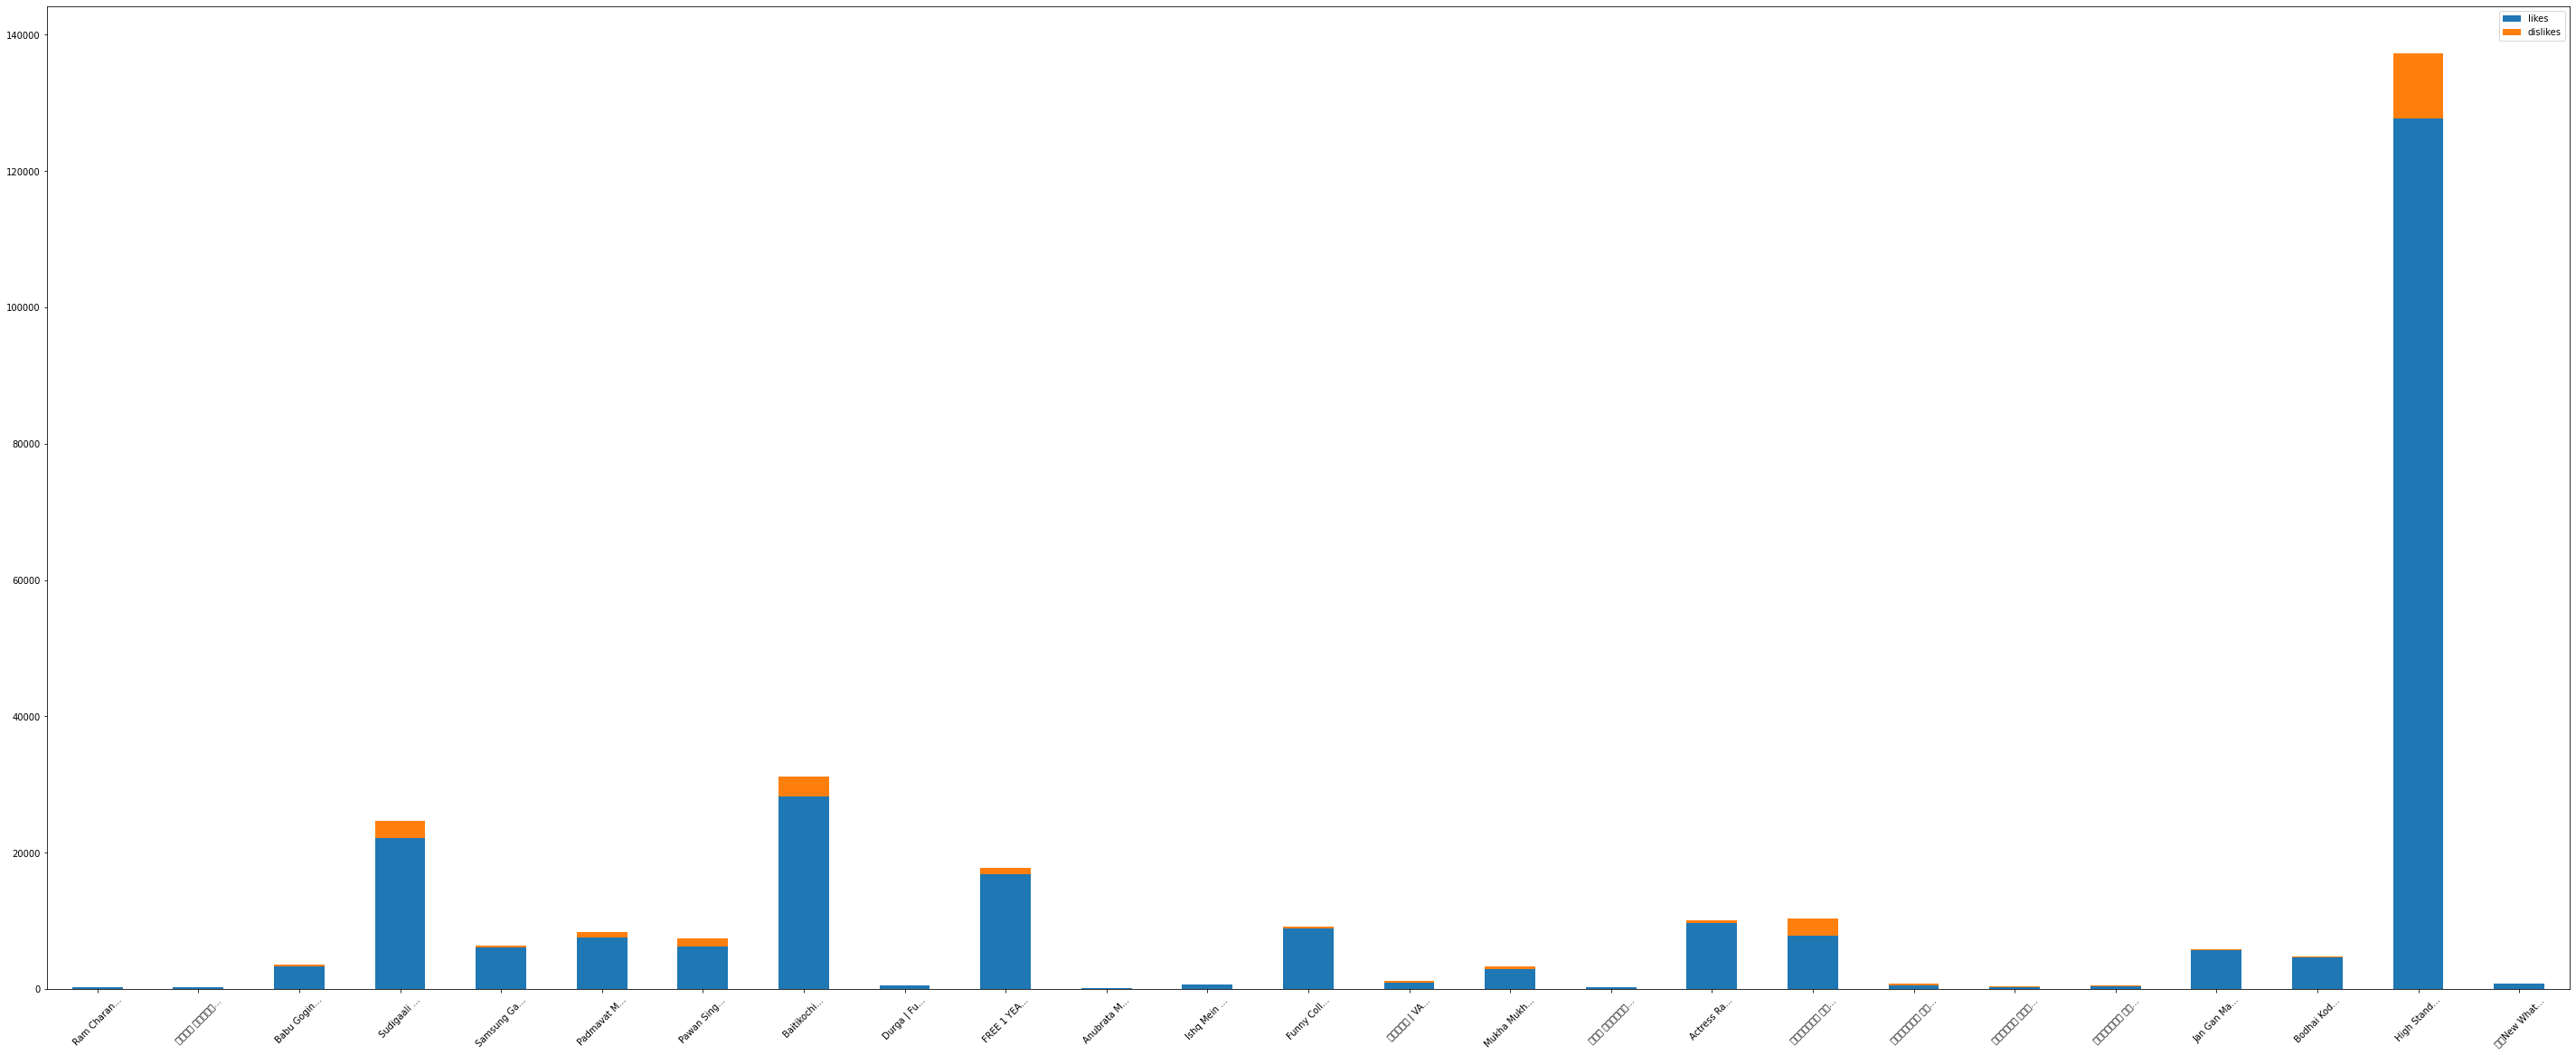

In [99]:
visualize_like_dislike(df, sample_id_list)

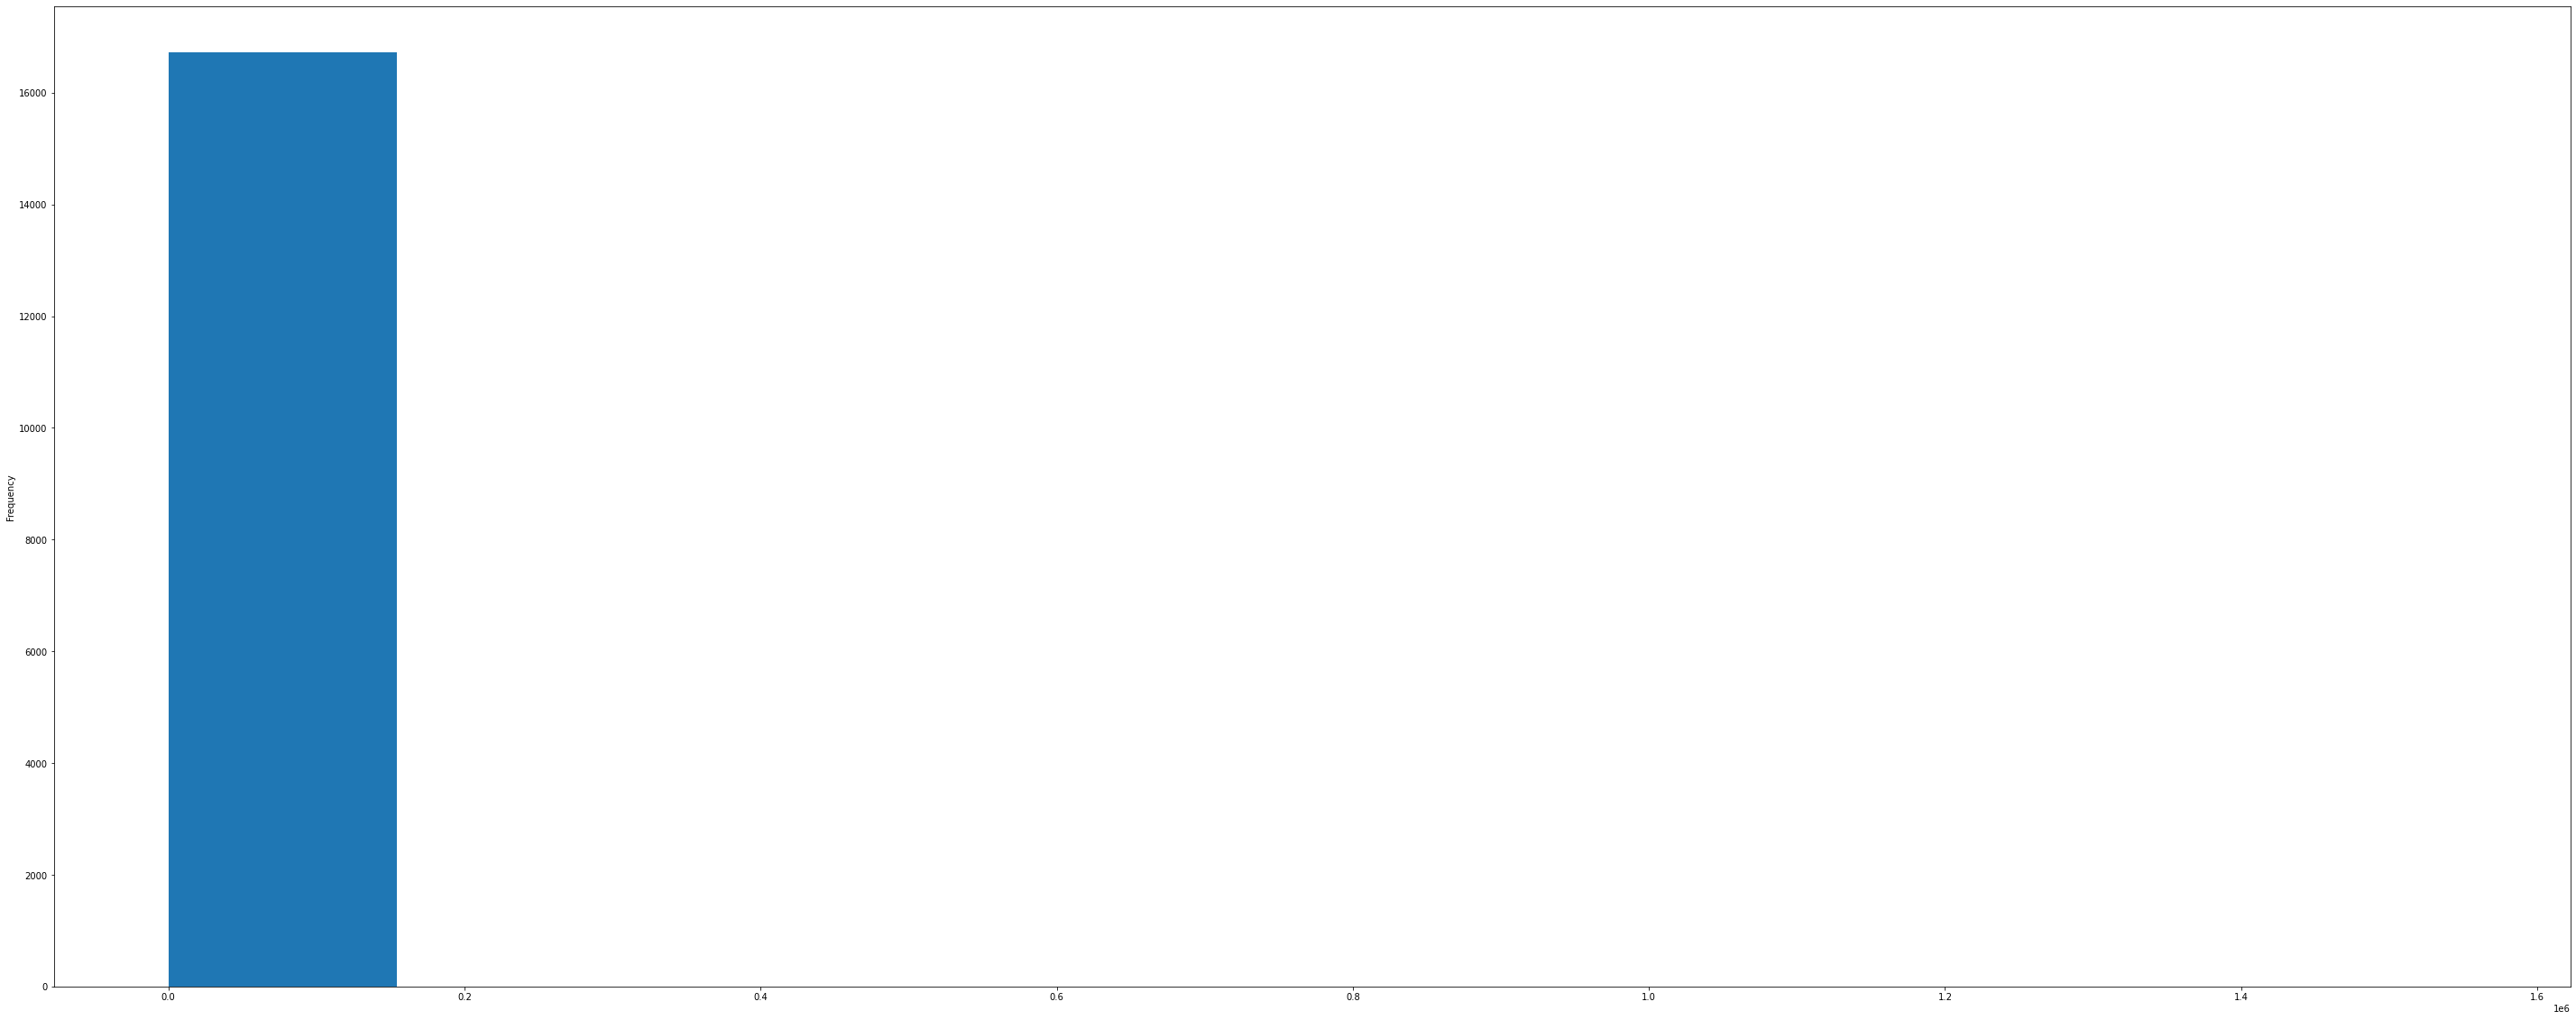

In [100]:
df['dislikes'].plot.hist()
rcParams['figure.figsize'] = 50,10
plt.show()

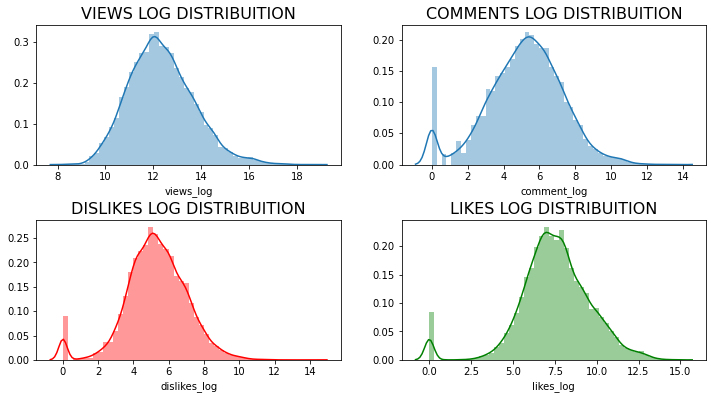

In [101]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)



plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [102]:
X = df[['likes','views','dislikes','comment_count']]
m1=df['viral'].astype(int)
y = pd.DataFrame(df['viral'])
df['inviral'] = df['viral'].astype(int)

#X.shape
y.shape

(16721, 1)

In [103]:
dfcm = df[['views','likes','dislikes','comment_count','viral']]
corr= dfcm.corr()
corr

,views,likes,dislikes,comment_count,viral
views,1.000000,0.842995,0.581571,0.662194,0.627035
likes,0.842995,1.000000,0.508420,0.759787,0.542491
dislikes,0.581571,0.508420,1.000000,0.700125,0.196640
comment_count,0.662194,0.759787,0.700125,1.000000,0.303404
viral,0.627035,0.542491,0.196640,0.303404,1.000000


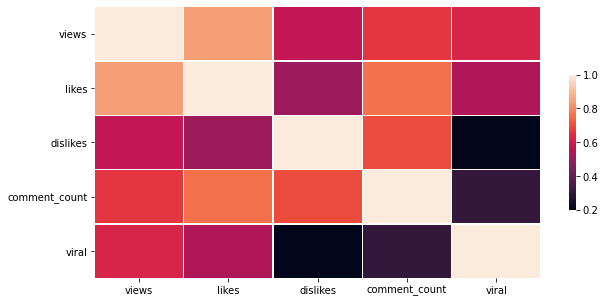

In [104]:
rcParams['figure.figsize'] = 10,5
sns.heatmap(corr,  linewidths=.5, cbar_kws={"shrink": .5})

In [105]:
#Splitting out data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)
print(y_train.shape)
print(y_test.shape)
y.shape

(11704, 1)
(5017, 1)


(16721, 1)

In [106]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.674704
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -6.444    
Dependent Variable: viral            AIC:              22571.4577
Date:               2020-07-17 00:16 BIC:              22602.3554
No. Observations:   16721            Log-Likelihood:   -11282.   
Df Model:           3                LL-Null:          -1515.5   
Df Residuals:       16717            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
likes             0.0000   0.0000  13.8554 0.0000  0.0000  0.0000
views            -0.0000   0.0000 -18.3244 0.0000 -0.0000 -0.0000


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print (logreg.score(X_train, y_train))

0.9167805878332194


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
#Magic happens here
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4585  343]
 [  79   10]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.93      0.96      4928
        True       0.03      0.11      0.05        89

    accuracy                           0.92      5017
   macro avg       0.51      0.52      0.50      5017
weighted avg       0.97      0.92      0.94      5017



In [111]:
#ROC Curve

In [113]:
df['viral']

6         True
12       False
13       False
16       False
22       False
         ...  
37347    False
37348    False
37349    False
37350    False
37351    False
Name: viral, Length: 16721, dtype: bool

In [114]:
df['engagement'] = df['likes'] + df['dislikes'] + df['comment_count']

In [115]:
df['engagement'].max()

5265285

In [116]:
df[df['engagement']== 5265285]

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral,likes_log,views_log,dislikes_log,comment_log,inviral,engagement
5408,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",6,True,14.884595,18.647276,14.250546,13.601771,1,5265285


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


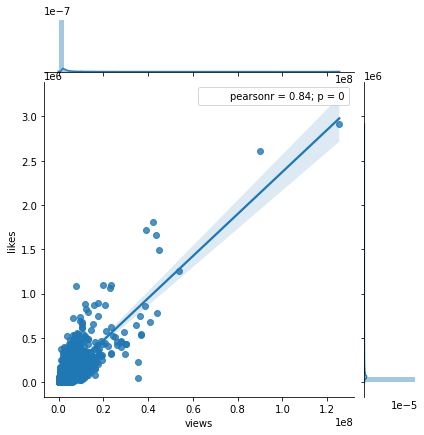

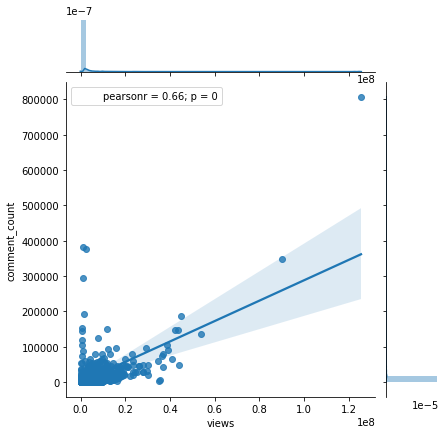

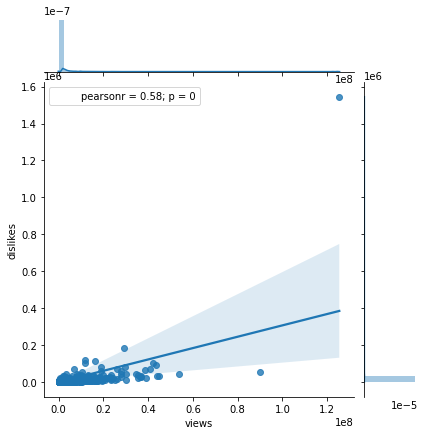

<Figure size 3200x1800 with 0 Axes>

In [117]:
import scipy.stats  as stats
likes = sns.jointplot(x ='views', y ='likes', data=df, kind='reg')
likes.annotate(stats.pearsonr)
comment_count = sns.jointplot(x ='views', y ='comment_count', data=df, kind='reg')
comment_count.annotate(stats.pearsonr)
dislikes = sns.jointplot(x ='views', y ='dislikes', data=df, kind='reg')
dislikes.annotate(stats.pearsonr)
plt.figure(figsize=(16, 9), dpi=200)
plt.show()

In [ ]:
ggplot(viral, aes(publish_hour, col = "white"))+
  geom_histogram(binwidth = 1)+
  guides(fill="none")+
  labs(caption="ksvrd",
       title="Most Common Publishing Hour of Day")+
  scale_x_continuous(breaks=seq(0, 25, 1))+
  xlab(NULL)+
  ylab(NULL)+
  theme_bw()

SyntaxError: ignored

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: ignored